Tri datuma kada je koncentracija PM10 najveća: 
20   2017-01-21 23:00:00+00:00
19   2017-01-20 23:00:00+00:00
28   2017-01-29 23:00:00+00:00
Name: vrijeme, dtype: datetime64[ns, UTC]


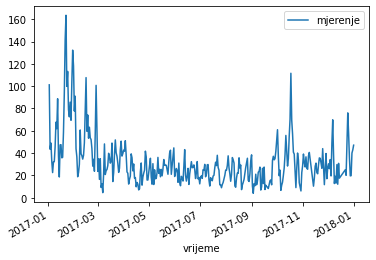

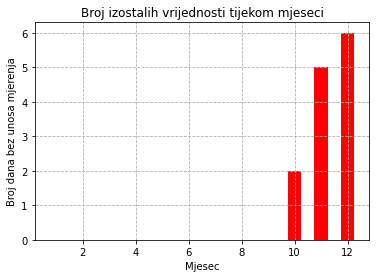

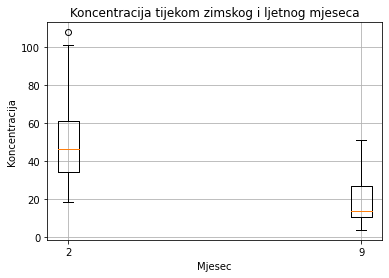

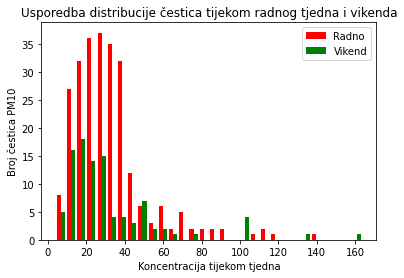

In [28]:
import urllib.request
import pandas as pd
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np

url = "http://iszz.azo.hr/iskzl/rs/podatak/export/xml?postaja=160&polutant=5&tipPodatka=5&vrijemeOd=02.01.2017&vrijemeDo=01.01.2018"

airQualityHR = urllib.request.urlopen(url).read()
root = ET.fromstring(airQualityHR)

df = pd.DataFrame(columns=('mjerenje', 'vrijeme'))

i = 0
children = list(root)
while True:
    try:
        
        obj = list(children[i])
    except:
        break
        
    row = dict(zip(['mjerenje', 'vrijeme'], [obj[0].text, obj[2].text]))
    row_s = pd.Series(row)
    row_s.name = i
    df = df.append(row_s)
    df.mjerenje[i] = float(df.mjerenje[i])
    i = i + 1
df.vrijeme = pd.to_datetime(df.vrijeme,utc=True)
df.plot(y='mjerenje', x='vrijeme');

# add date month and day designator
df['month'] = pd.DatetimeIndex(df['vrijeme']).month
df['dayOfweek'] = pd.DatetimeIndex(df['vrijeme']).dayofweek

#3.2 Ispis tri datuma u godini kada je koncentracija PM10 bila najveća. 

ThreeBiggestPM10ByYear = df.sort_values(by=['mjerenje'], ascending = False)
print("Tri datuma kada je koncentracija PM10 najveća: ")
print(ThreeBiggestPM10ByYear['vrijeme'].head(3))

#3.3 Pomoću barplot prikažite ukupni broj izostalih vrijednosti tijekom svakog mjeseca. 

index=np.arange(1,13,1)
prazni=[]
for i in range(1,13):   
    mjesec= df[df.month==i]
    if (i==1) or (i==3) or(i==5) or(i==7) or (i==8) or (i==10) or (i==12):
        prazni.append(31-len(mjesec))  
    elif (i==4) or (i==6) or(i==9) or(i==11):
        prazni.append(30-len(mjesec))  
    else:
        prazni.append(28-len(mjesec)) 

plt.figure()
plt.bar(index,prazni,0.5,color=(1,0,0))  
plt.title("Broj izostalih vrijednosti tijekom mjeseci")
plt.xlabel("Mjesec")
plt.ylabel("Broj dana bez unosa mjerenja")
plt.grid(linestyle="--")

#3.4 Pomoću boxplot usporedite PM10 koncentraciju tijekom jednog zimskog i jednog ljetnog mjeseca.

veljaca=df[df.month==2]
rujan=df[df.month==9]
veljacaData= []
rujanData = []

for i in veljaca['mjerenje']:
    veljacaData.append(i)
for i in rujan['mjerenje']:
    rujanData.append(i)
    
plt.figure()
plt.boxplot([veljacaData, rujanData], positions = [2,9]) 
plt.title("Koncentracija tijekom zimskog i ljetnog mjeseca")
plt.xlabel('Mjesec')
plt.ylabel('Koncentracija')
plt.grid(linestyle='-')

#3.5 Usporedbu distribucije PM10 čestica tijekom radnih dana s distribucijom čestica tijekom vikenda.

radni_tj=[]
vikend_tj=[]
radni = df[(df.dayOfweek == 0)|(df.dayOfweek == 1)|(df.dayOfweek == 2)|(df.dayOfweek == 3)|(df.dayOfweek == 4)]
vikend = df[(df.dayOfweek == 5)|(df.dayOfweek == 6)]
for i in vikend['mjerenje']:
    vikend_tj.append(i)
for i in radni['mjerenje']:
    radni_tj.append(i)
    
bins=30
plt.figure()
plt.hist([radni_tj,vikend_tj],bins,color = ['red','green'])
plt.title("Usporedba distribucije čestica tijekom radnog tjedna i vikenda")
plt.xlabel("Koncentracija tijekom tjedna")
plt.ylabel("Broj čestica PM10")
plt.legend(['Radno','Vikend'],loc=1)